In [ ]:
import sklearn
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

from utils import plot_decision_boundary

In [34]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [10]:
print(X.shape) # features
print(y.shape) # labels (binary classification, either 0 or 1)

(1000, 2)
(1000,)


In [12]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"Corresponding labels, y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Corresponding labels, y:
 [1 1 1 1 0]


In [17]:
df = pd.DataFrame({"X1": X[:, 0], # all rows and col 1st
                   "X2": X[:, 1], # all rows and col 2nd
                    "label": y})
df

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [22]:
df.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

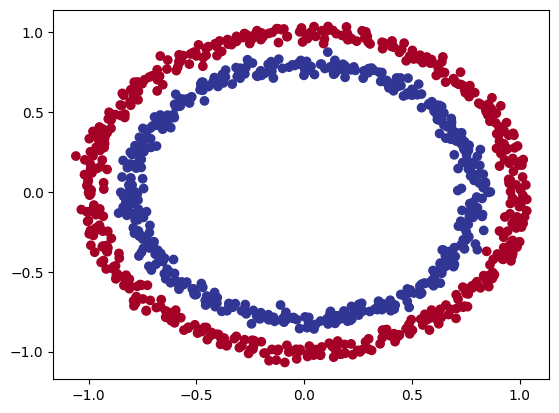

In [24]:
# Visualize, visualize, visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [35]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [30]:
# train_size = int(len(X) * 0.75)

# X_train, y_train = X[0:train_size, :], y[0:train_size]
# X_test, y_test = X[train_size:, :], y[train_size:]


(750, 750, '.....', 250, 250)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)
len(X_train), len(y_train), ".....", len(X_test), len(y_test)

(800, 800, '.....', 200, 200)

In [39]:
y_train.shape


torch.Size([800])

In [47]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )


    def forward(self, x):
        l1_out = self.layer_1(x)
        return self.layer_2(l1_out)
#         return self.two_linear_layers(x)

In [50]:
model_0 = CircleModelV0().to(device)

In [46]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.6374,  0.5458],
         [ 0.2799, -0.4072],
         [ 0.1871, -0.6607],
         [-0.2653, -0.3235],
         [ 0.2839, -0.1591]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3499, -0.4953, -0.5955,  0.1520,  0.3369], requires_grad=True),
 Parameter containing:
 tensor([[-0.3650,  0.2198, -0.1631, -0.3611,  0.0169]], requires_grad=True),
 Parameter containing:
 tensor([0.2773], requires_grad=True)]

In [49]:

# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [51]:
model_0.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.2562, -0.0068],
                      [ 0.4707, -0.1855],
                      [ 0.5144, -0.0388],
                      [ 0.4264, -0.3933],
                      [-0.6555,  0.1381]])),
             ('layer_1.bias',
              tensor([-0.4844,  0.6120,  0.4317,  0.0600, -0.4645])),
             ('layer_2.weight',
              tensor([[ 0.0453, -0.1902,  0.1996,  0.4278, -0.2078]])),
             ('layer_2.bias', tensor([0.1255]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))


print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [-0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
predictions = torch.round(untrained_preds[:10]).squeeze()
print("PREDICTIONS: ", predictions)
labels = y_test[:10]
print("LABELS: ", labels)
torch.eq(predictions, labels)

PREDICTIONS:  tensor([-0., 0., 0., -0., 0., 1., 0., 1., -0., 0.])
LABELS:  tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


tensor([False,  True, False,  True, False,  True,  True, False, False,  True])

In [78]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

### Going from raw logits -> prediction probabilities -> prediction labels

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0491],
        [ 0.0380],
        [ 0.0076],
        [-0.0664],
        [ 0.4600]])

In [70]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4877],
        [0.5095],
        [0.5019],
        [0.4834],
        [0.6130]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [73]:
# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

In [ ]:
# Setup the loss function

# BCELoss = requires inputs to have gone through the sigmoid activation
#           function prior to input to BCELoss
# loss_fn = nn.BCELoss()

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # y_logits -> result of before applying any activation function

  # 2. Calculate loss
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits,  y_train) # nn.BCEWithLogitsLoss expects raw logits as input

  # Calculate accuracy
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
  acc = accuracy_fn(y_true=y_train,  y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70570, Acc: 52.38% | Test loss: 0.70335, Test acc: 54.00%
Epoch: 10 | Loss: 0.69907, Acc: 50.25% | Test loss: 0.69777, Test acc: 53.50%
Epoch: 20 | Loss: 0.69667, Acc: 49.75% | Test loss: 0.69576, Test acc: 53.00%
Epoch: 30 | Loss: 0.69561, Acc: 50.25% | Test loss: 0.69487, Test acc: 48.50%
Epoch: 40 | Loss: 0.69502, Acc: 50.75% | Test loss: 0.69436, Test acc: 45.00%
Epoch: 50 | Loss: 0.69462, Acc: 50.00% | Test loss: 0.69403, Test acc: 46.50%
Epoch: 60 | Loss: 0.69433, Acc: 50.25% | Test loss: 0.69379, Test acc: 45.50%
Epoch: 70 | Loss: 0.69410, Acc: 50.50% | Test loss: 0.69361, Test acc: 46.00%
Epoch: 80 | Loss: 0.69392, Acc: 50.75% | Test loss: 0.69347, Test acc: 46.00%
Epoch: 90 | Loss: 0.69378, Acc: 50.62% | Test loss: 0.69337, Test acc: 46.00%


## Building model with non-linearity

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu    = nn.ReLU()



    def forward(self, x):
        z = self.layer_1(x)
        a = self.relu(z)
        z = self.layer_2(a)
        a = self.relu(z)
        z = self.layer_3(a)
        return z

In [95]:
model_1 = CircleModelV1().to(device)

In [83]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]])),
             ('layer_1.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642])),
             ('layer_2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.2663,  0.1232, -0.0157, -0.1907, -0.1

In [100]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

    # Training
    model_1.train()

    # Forward Pass
    y_logits = model_1.forward(X_train).squeeze()

    # Loss
    loss = loss_fn(y_logits, y_train)

    y_pred = torch.round(torch.sigmoid(y_logits))

     # Accuracy
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # Reset gradients
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Gradient Descent
    optimizer.step()

    # Testing
    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1.forward(X_test).squeeze()

        # Test loss
        test_loss = loss_fn(test_logits, y_test)

        test_preds = torch.round(torch.sigmoid(test_logits))

        # Accuracy
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

        # Print out what's happenin'
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.00594, Acc: 100.00% | Test loss: 0.01568, Test acc: 100.00%
Epoch: 100 | Loss: 0.00578, Acc: 100.00% | Test loss: 0.01539, Test acc: 100.00%
Epoch: 200 | Loss: 0.00563, Acc: 100.00% | Test loss: 0.01512, Test acc: 100.00%
Epoch: 300 | Loss: 0.00549, Acc: 100.00% | Test loss: 0.01486, Test acc: 100.00%
Epoch: 400 | Loss: 0.00535, Acc: 100.00% | Test loss: 0.01461, Test acc: 100.00%
Epoch: 500 | Loss: 0.00523, Acc: 100.00% | Test loss: 0.01437, Test acc: 100.00%
Epoch: 600 | Loss: 0.00511, Acc: 100.00% | Test loss: 0.01414, Test acc: 100.00%
Epoch: 700 | Loss: 0.00499, Acc: 100.00% | Test loss: 0.01392, Test acc: 100.00%
Epoch: 800 | Loss: 0.00488, Acc: 100.00% | Test loss: 0.01372, Test acc: 100.00%
Epoch: 900 | Loss: 0.00478, Acc: 100.00% | Test loss: 0.01352, Test acc: 100.00%


In [102]:
# Makes predictions
model_1.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Multiclass classification

In [125]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 3
RANDOM_SEED = 42

# Make 1000 samples
n_samples = 1000

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=n_samples,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.2, # give the clusters a little shake up
                            random_state=RANDOM_SEED)


# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


print(X_blob.shape) # features
print(y_blob.shape) # labels (multiclass classification, 4 classes)

torch.Size([1000, 3])
torch.Size([1000])


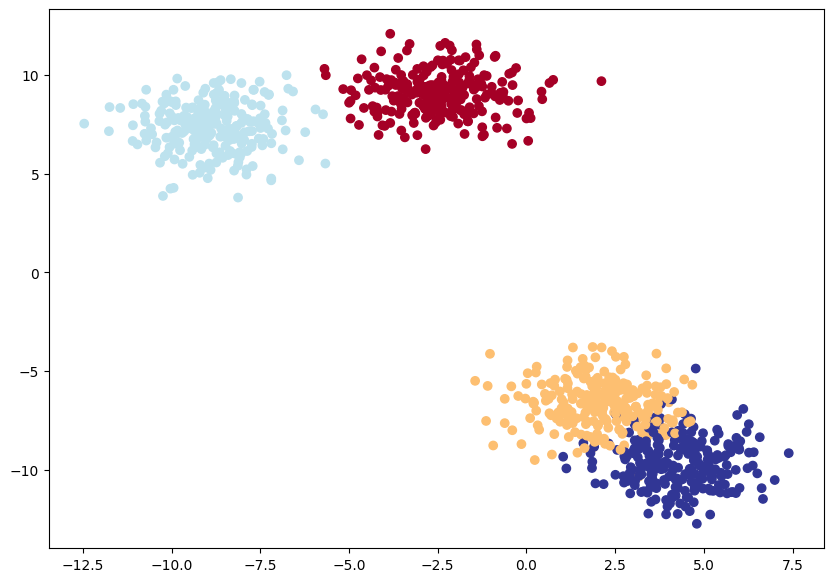

In [126]:
# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                        y_blob,
                                                        test_size=0.2, # 20% of data will be test & 80% will be train
                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);




In [119]:
df = pd.DataFrame({"X1": X_blob[:, 0], # all rows and col 1st
                   "X2": X_blob[:, 1], # all rows and col 2nd
                   "X3": X_blob[:, 2], # all rows and col 3nd
                   "label": y_blob})
df

,X1,X2,X3,label
0,-8.714668,5.137196,1.558487,2
1,3.006458,-11.532485,8.714016,3
2,1.858093,-8.453127,10.316900,3
3,-5.219405,8.500429,1.993410,2
4,4.526492,-6.518497,-2.977585,1
...,...,...,...,...
995,-2.746209,8.373964,3.121722,0
996,3.949261,-6.583228,-3.767218,1
997,0.191772,-6.414896,-5.929444,1
998,3.408223,-8.058611,-8.876959,1


In [120]:
df.label.value_counts()

label
2    250
3    250
1    250
0    250
Name: count, dtype: int64

In [117]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )



    def forward(self, x):
        return self.linear_layer_stack(x)

In [ ]:
model_blob = BlobModel(
              input_features=3,
              output_features=4,
              hidden_units=8).to(device)

In [ ]:
# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)



y_pred_logits = model_blob(X_blob_train)
print(y_pred_logits.shape)
print(y_blob_train.shape)

# Convert model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_pred_logits, dim=1)
print(y_pred_probs)

print(y_pred_probs.sum(dim=1, keepdims=True)[0:10])

# Find the index where probability is max
print(torch.argmax(y_pred_probs, dim=1, keepdims=True)[0:10])

# Convert our model's prediction probabilities to prediction labels
y_pred_labels = torch.argmax(y_pred_probs, dim=1)

print("Predctions:")
print(y_pred_labels[0:10])

print("Targets:")
print(y_blob_train[0:10])


torch.Size([800, 4])
torch.Size([800])
tensor([[0.1068, 0.1070, 0.2118, 0.5745],
        [0.2061, 0.2024, 0.3050, 0.2865],
        [0.2104, 0.1813, 0.3078, 0.3006],
        ...,
        [0.2155, 0.1751, 0.3049, 0.3046],
        [0.2044, 0.2054, 0.3037, 0.2865],
        [0.1423, 0.1199, 0.2476, 0.4902]], grad_fn=<SoftmaxBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)
tensor([[3],
        [2],
        [2],
        [3],
        [2],
        [2],
        [2],
        [2],
        [2],
        [3]])
Predctions:
tensor([3, 2, 2, 3, 2, 2, 2, 2, 2, 3])
Targets:
tensor([0, 1, 3, 3, 1, 1, 1, 3, 3, 2])


In [162]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_blob.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

for epoch in range(epochs):

    # Training
    model_blob.train()

    # Forward Pass
    y_pred_logits = model_blob(X_blob_train)

    # Loss
    loss = loss_fn(y_pred_logits, y_blob_train)

    y_pred_probs = torch.softmax(y_pred_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)

    # Accuracy
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred_labels)

    # Zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Gradient Descent
    optimizer.step()


    # Testing
    model_blob.eval()

    with torch.inference_mode():
        y_test_logits = model_blob(X_blob_test)

        # Test Loss
        test_loss = loss_fn(y_test_logits, y_blob_test)

        y_test_probs = torch.softmax(y_test_logits, dim=1)
        y_test_labels = torch.argmax(y_test_probs, dim=1)

        # Test Accuracy
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_labels)

        # Print out what's happenin'
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.57793, Acc: 2.12% | Test loss: 1.34903, Test acc: 20.50%
Epoch: 100 | Loss: 0.01143, Acc: 100.00% | Test loss: 0.00873, Test acc: 100.00%
Epoch: 200 | Loss: 0.00545, Acc: 100.00% | Test loss: 0.00332, Test acc: 100.00%
Epoch: 300 | Loss: 0.00375, Acc: 100.00% | Test loss: 0.00193, Test acc: 100.00%
Epoch: 400 | Loss: 0.00294, Acc: 100.00% | Test loss: 0.00132, Test acc: 100.00%
Epoch: 500 | Loss: 0.00246, Acc: 100.00% | Test loss: 0.00098, Test acc: 100.00%
Epoch: 600 | Loss: 0.00214, Acc: 100.00% | Test loss: 0.00077, Test acc: 100.00%
Epoch: 700 | Loss: 0.00191, Acc: 100.00% | Test loss: 0.00062, Test acc: 100.00%
Epoch: 800 | Loss: 0.00174, Acc: 100.00% | Test loss: 0.00052, Test acc: 100.00%
Epoch: 900 | Loss: 0.00160, Acc: 100.00% | Test loss: 0.00044, Test acc: 100.00%


In [165]:

# Make predictions
model_blob.eval()
with torch.inference_mode():
  y_logits = model_blob(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 1.8961e+00,  4.9454e-03, -1.1833e+01,  1.2438e+01],
        [-7.2073e+00,  6.6273e+00, -1.8325e+00, -4.8661e+00],
        [-7.6924e+00,  7.6358e+00, -3.2862e+00, -3.0976e+00],
        [ 1.3454e+00,  1.6671e-01, -1.0213e+01,  1.1070e+01],
        [-6.6906e+00, -3.7937e+00,  5.9466e+00, -1.0884e+01],
        [ 2.0461e+00, -8.0745e-02, -1.1528e+01,  1.1936e+01],
        [-5.3140e+00,  5.0967e+00, -1.6857e+00, -3.1497e+00],
        [-6.6670e+00,  6.3510e+00, -1.9495e+00, -4.2126e+00],
        [-9.2594e+00,  8.3323e+00, -1.8313e+00, -7.0530e+00],
        [ 1.6915e+00, -6.9368e-02, -1.0001e+01,  1.0316e+01]])

In [166]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.6409e-05, 3.9852e-06, 2.8799e-11, 9.9997e-01],
        [9.8092e-07, 9.9978e-01, 2.1178e-04, 1.0195e-05],
        [2.2032e-07, 9.9996e-01, 1.8056e-05, 2.1803e-05],
        [5.9771e-05, 1.8391e-05, 5.7115e-10, 9.9992e-01],
        [3.2486e-06, 5.8854e-05, 9.9994e-01, 4.9014e-08],
        [5.0682e-05, 6.0416e-06, 6.4546e-11, 9.9994e-01],
        [3.0064e-05, 9.9858e-01, 1.1319e-03, 2.6182e-04],
        [2.2194e-06, 9.9972e-01, 2.4833e-04, 2.5834e-05],
        [2.2909e-08, 9.9996e-01, 3.8546e-05, 2.0809e-07],
        [1.7953e-04, 3.0861e-05, 1.5000e-09, 9.9979e-01]])

In [170]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
print("Predictions:",  y_preds[:10])
print("Targets:", y_blob_test[0:10])

print(y_preds[:10] == y_blob_test[0:10])

Predictions: tensor([3, 1, 1, 3, 2, 3, 1, 1, 1, 3])
Targets: tensor([3, 1, 1, 3, 2, 3, 1, 1, 1, 3])
tensor([True, True, True, True, True, True, True, True, True, True])


In [182]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Train")
# plot_decision_boundary(model=model_blob, X=X_blob_train, y=y_blob_train)
# plt.subplot(1, 2, 2)
# plt.title("Test")
# plot_decision_boundary(model=model_blob, X=X_blob_test, y=y_blob_test)

In [175]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [180]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculuate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(1.)